<a href="https://colab.research.google.com/github/Thamminenisatish/Projects/blob/main/Project_Airbnb_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project by:**
#**Thammineni Satish**

# **Project Name**    - Airbnb analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

####The goal of this project is to perform Exploratory Data Ananlysis (EDA) on the Airbnb NYC 2019 data set.This data set contains information on Airbnb listings in New York city, including details about the listings such as location, price, availability, and host information. The EDA aims to uncover insights that can help improve Airbnb's business strategy by understanding the trends and pattern in the data.

# **GitHub Link -**

https://github.com/Thamminenisatish/ACL_Scripts/blob/main/Project_Airbnb_analysis.ipynb

# **Problem Statement**


Airbnb wants to optimize its listings and improve customer satisfaction by understanding various factors affecting performance and popularity of its listings in New York city.

#### **Define Your Business Objective?**

Business Objective:
1. Identify key areas in New York city with high demand of Airbnb listings.
2. Understand pricing trends to help hosts set compititive prices.
3. Analyze the distribution of different room types and their popularity.
4. Examine the availability of listings to optize booking opportunities.
5. Identify patterns in customer reviews to improve service quality.

By achieving these objectives, Airbnb aims to increase occupancy rates, enhance customer satisfaction and optimize revenue generation.




# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [25]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
# Load Dataset
path = '/content/drive/MyDrive/Colab Notebooks/Datasets/Copy of Airbnb NYC 2019.csv'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset First View

In [4]:
# Dataset First Look
df = pd.read_csv(path)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
#df.shape -->  we use simply this one also
print(f"This data set has {df.shape[0]} rows and {df.shape[1]} columns")

This data set has 48895 rows and 16 columns


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_values = df.duplicated().sum()
print(f'There are {duplicate_values} duplicate values in the data set.')

There are 0 duplicate values in the data set.


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()
print(missing_values)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


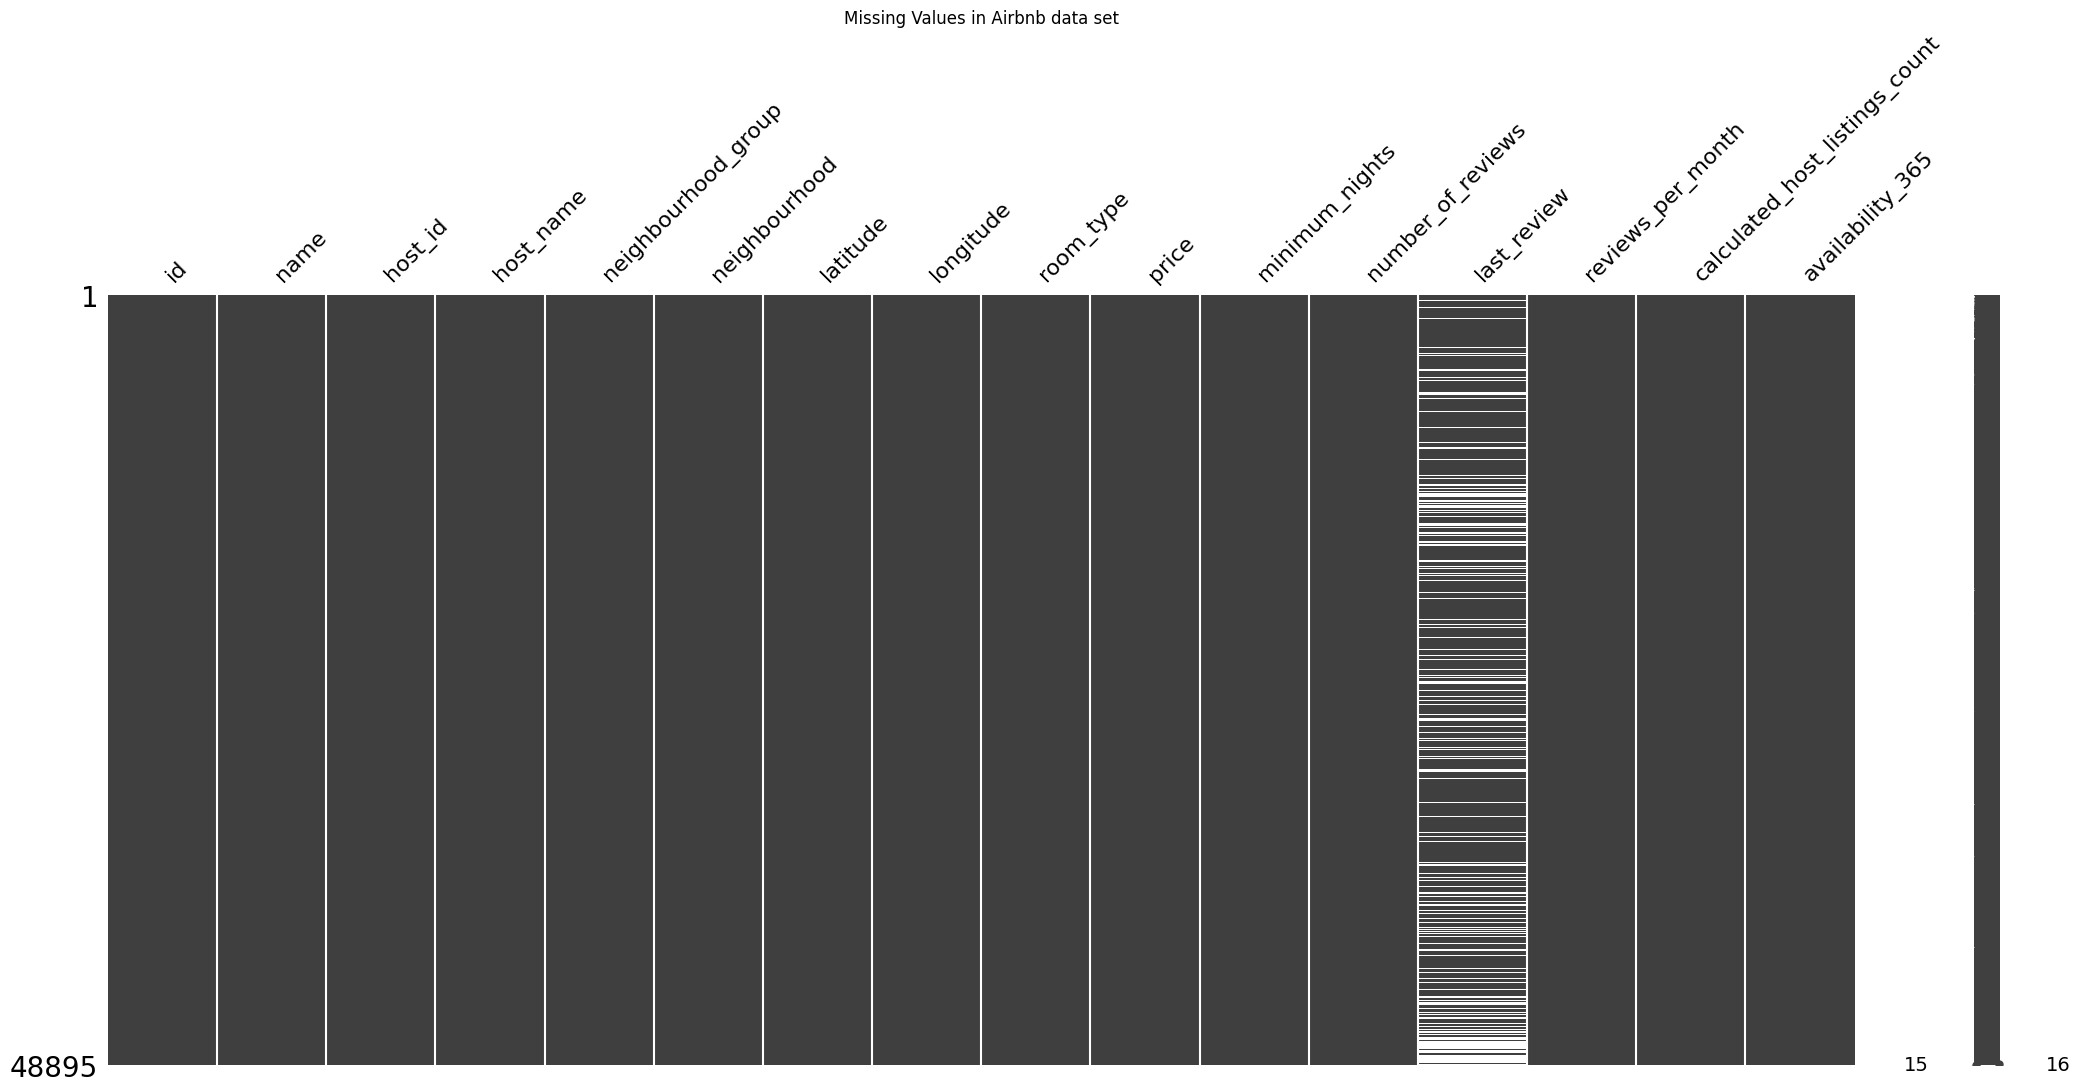

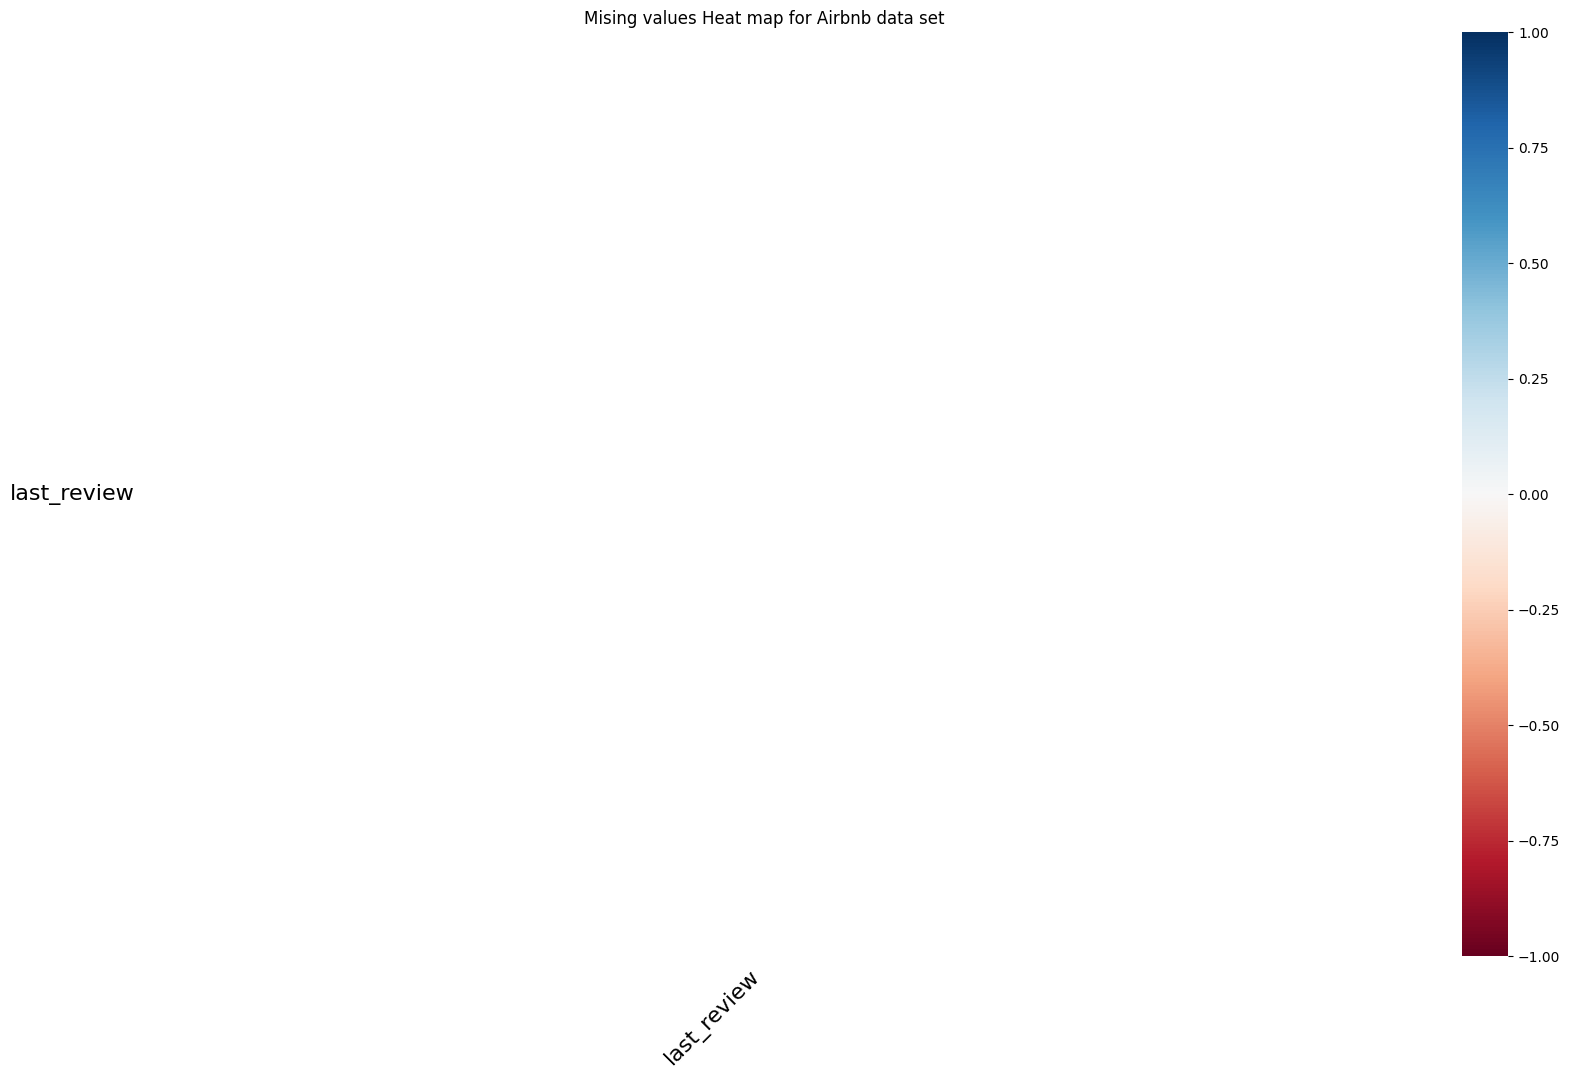

In [ ]:
# Visualizing the missing values
import missingno as msno

plt.rcParams['figure.figsize'] = (10,6)
msno.matrix(df)
plt.title("Missing Values in Airbnb data set")
plt.show()

msno.heatmap(df)
plt.title("Mising values Heat map for Airbnb data set")
plt.show()

### What did you know about your dataset?

**The data set contains information about Airbnb listings in NYC from 2019. It has 48895 entries and 16 columns. The columns include details such as listing id, name, host details, neighborhood, geographical coordinates, room type, price, minimum nights, number of reviews, last review data, reviews per month, host listings count, and availability. There are some missing values in 'name', 'host_name', 'last_review' and 'reviews_per_month' columns.**  

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()        # we can use "df.describe(include='all')" also.

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**id:** Unique identifier for the listing

**name:** Name of the listing

**host_id:** Unique identifier for the host

**host_name:** Name of the host

**neighbourhood_group:** Borough of the listing

**neighbourhood:** Specific neighbourhood of the listing

**latitude:** Latitude coordinates of the listing

**longitide:** Logitude coordinates of the listing

**room_type:** Type of room offered

**price:** Price per night

**minimum_nights:** Minimum nights required for booking

**number_of_reviews:** Total number of reviews received

**calculated_host_listings_count:** Number of listings the host has

**availability_365:** Number of days the listing available in a year.

### Check Unique Values for each variable.

In [ ]:
df.columns.nunique()

16

In [ ]:
# Check Unique Values for each variable.

In [ ]:
unique_values = {column:df[column].nunique() for column in df.columns}
unique_values

{'id': 48895,
 'name': 47905,
 'host_id': 37457,
 'host_name': 11452,
 'neighbourhood_group': 5,
 'neighbourhood': 221,
 'latitude': 19048,
 'longitude': 14718,
 'room_type': 3,
 'price': 674,
 'minimum_nights': 109,
 'number_of_reviews': 394,
 'last_review': 1764,
 'reviews_per_month': 937,
 'calculated_host_listings_count': 47,
 'availability_365': 366}

## 3. ***Data Wrangling***

### Data Wrangling Code

In [5]:
# Write your code to make your dataset analysis ready.
#Handling missing values
df['name'].fillna('No name provided', inplace = True)
df['host_name'].fillna('No host name provided', inplace = True)
df['reviews_per_month'].fillna(0, inplace = True)
df['last_review'].fillna('No reviews', inplace = True)

#check and handle duplicates
df.drop_duplicates(inplace = True)

#converting 'last_review' to datetime format
df['last_review'] = pd.to_datetime(df['last_review'], errors = 'coerce')

### What all manipulations have you done and insights you found?

**I have filled missing values for 'name' and 'host_name' with placeholder text. Filled 'reviews_per_month' with 0 where missing and 'last_review' with 'No reviews'. Duplicates were checked and removed, also 'last_review' converted to datatime format. These steps ensure data is clean and ready for analysis.**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

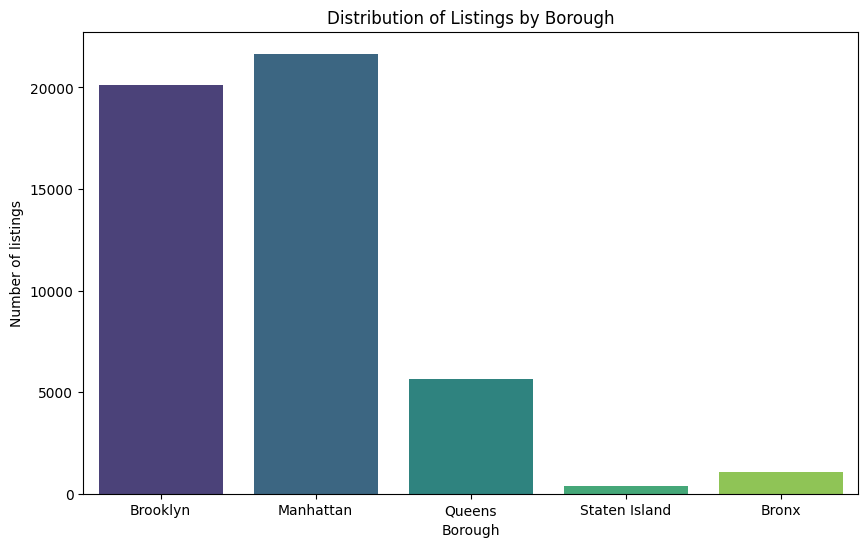

In [ ]:
# Chart - 1 "Count Plot"
# Distribution of listings by Borough
plt.rcParams['figure.figsize'] = (10,6)
sns.countplot(data = df, x = 'neighbourhood_group', palette='viridis')
plt.title("Distribution of Listings by Borough")
plt.xlabel("Borough")
plt.ylabel("Number of listings")
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is appropriate to show the distribution of categorical data, such as number of listings in each borough.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that Manhattan has highest number of listings, followedby Brooklyn. And the other boroughs are significantly fewer listings.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, knowing which boroughs have the most listings can help target marketting efforts and resource allocation more effectively.

### Chart - 2


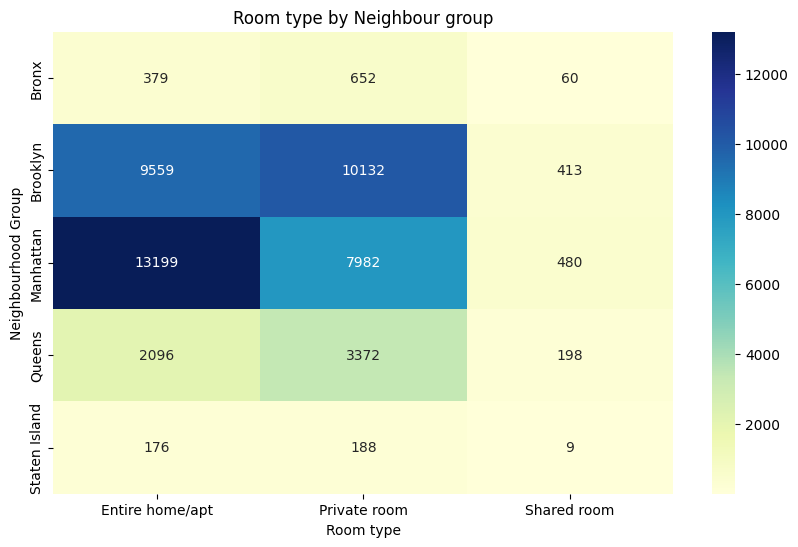

In [8]:
# Chart -2 Room type by Neighbourhood group (Heat Map)
room_neighbourhoodgrp = df.groupby(['neighbourhood_group','room_type']).size().unstack().fillna(0)
plt.rcParams['figure.figsize'] = (10,6)
sns.heatmap(room_neighbourhoodgrp, cmap = 'YlGnBu', annot = True, fmt = 'g')
plt.title('Room type by Neighbour group')
plt.xlabel('Room type')
plt.ylabel('Neighbourhood Group')
plt.show()

#### Chart - 3

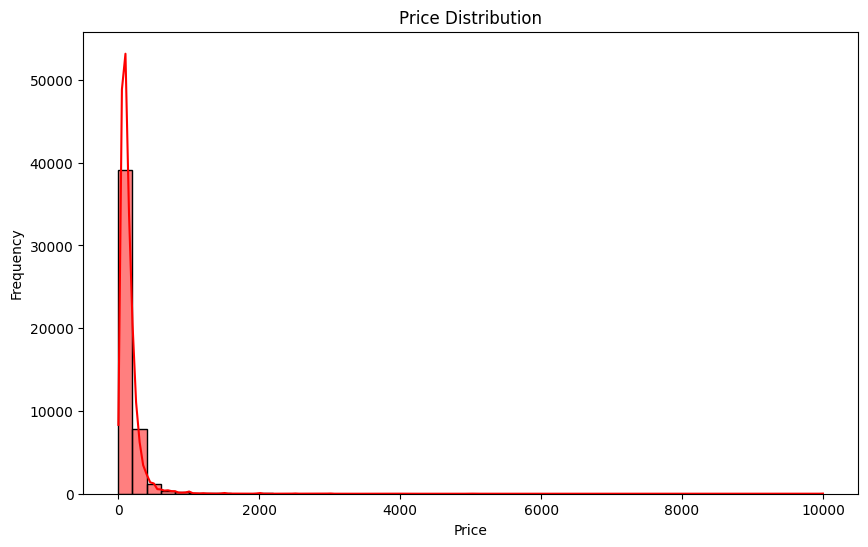

In [12]:
# Chart - 3 Price Distribution -- Histplot
sns.histplot(df['price'], bins = 50,kde = True, color = 'red', edgecolor = 'black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

**A histogram is suitable for understanding the distribution of numerical data such as listing prices.**

##### 2. What is/are the insight(s) found from the chart?

**Most listings have prices below 500, with a few outliers having very high prices.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, understanding price distribution helps in setting competitive prices and identifying outliers that may need special consideration.**

#### Chart - 4

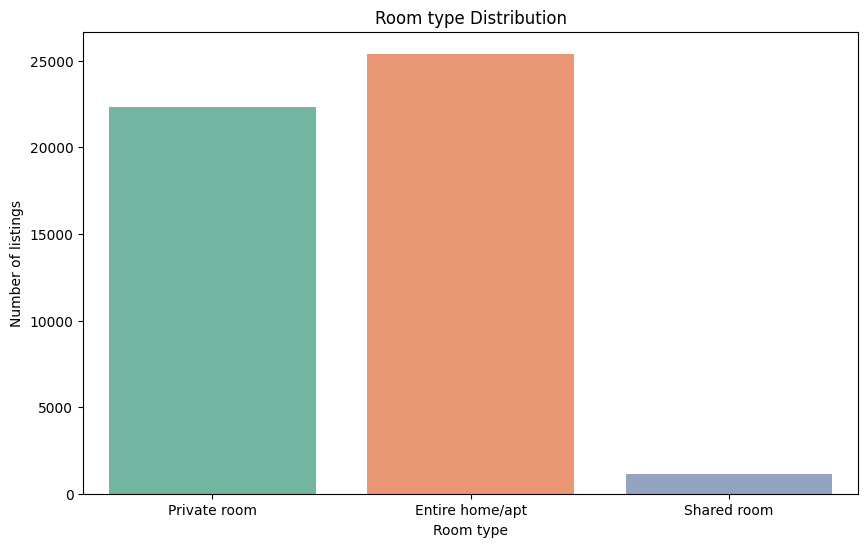

In [11]:
# Chart - 4 Bar chart
sns.countplot(data=df, x = 'room_type', palette='Set2')
plt.title('Room type Distribution')
plt.xlabel('Room type')
plt.ylabel('Number of listings')
plt.show()

##### 1. Why did you pick the specific chart?

**A bar chart is effective in showing the distribution of categorical data like room type.**

##### 2. What is/are the insight(s) found from the chart?

**The most common room is "Entire home/apt" followed by "Private room"**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, Understanding the popularity of room types can guide future listings and marketing strategies.**

### Chart - 5

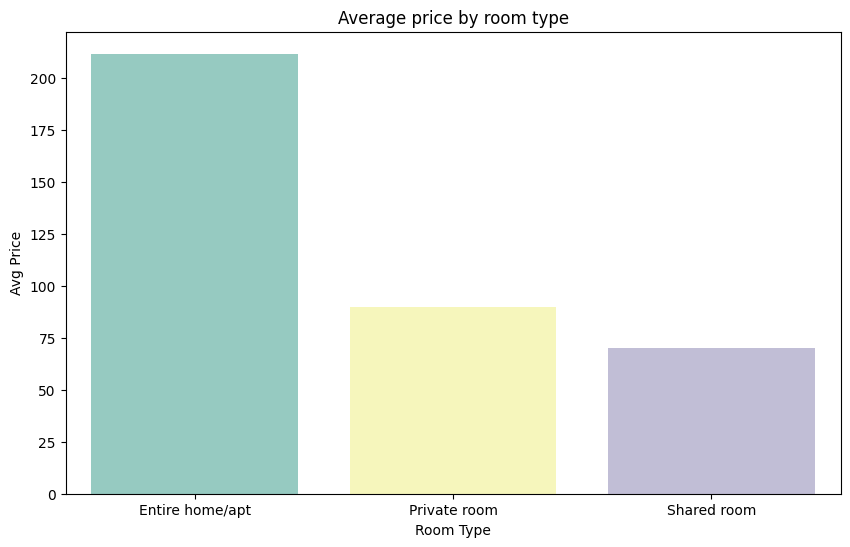

In [14]:
# Chart - 5 Avg price by room type -- Bar plot
avg_price_by_room_type = df.groupby('room_type')['price'].mean().reset_index()
sns.barplot(data = avg_price_by_room_type, x = 'room_type', y = 'price', palette='Set3')
plt.title('Average price by room type')
plt.xlabel('Room Type')
plt.ylabel('Avg Price')
plt.show()

#### Chart - 6

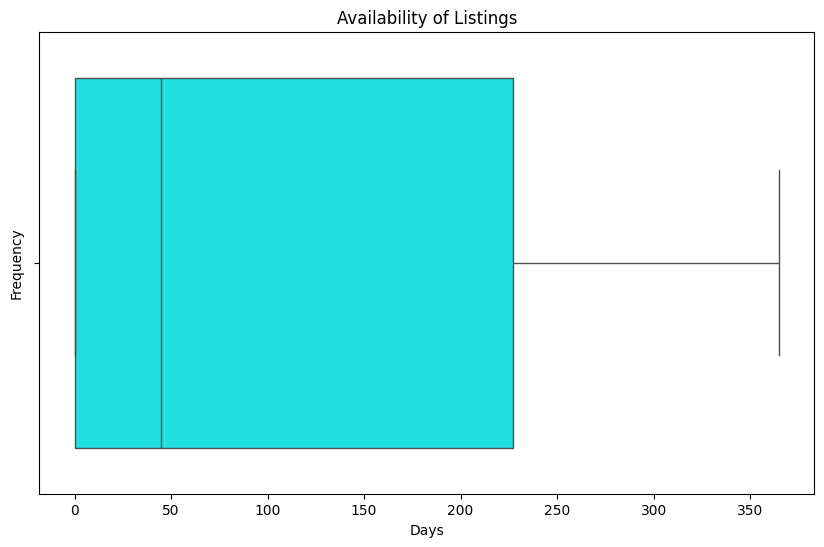

In [16]:
# Chart - 6 Box plot
# Availibility of Listings
sns.boxplot(data = df, x = 'availability_365',color = 'cyan')
plt.title('Availability of Listings')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

**A histogram helps to understand the distribution of numerical data, such as number of days listings are available.**

##### 2. What is/are the insight(s) found from the chart?

**Most listings have varied availablity. with some available throughout the year and others only for few days.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, this insight can help host optimize their listing availability to match demand patterns.**

#### Chart - 7

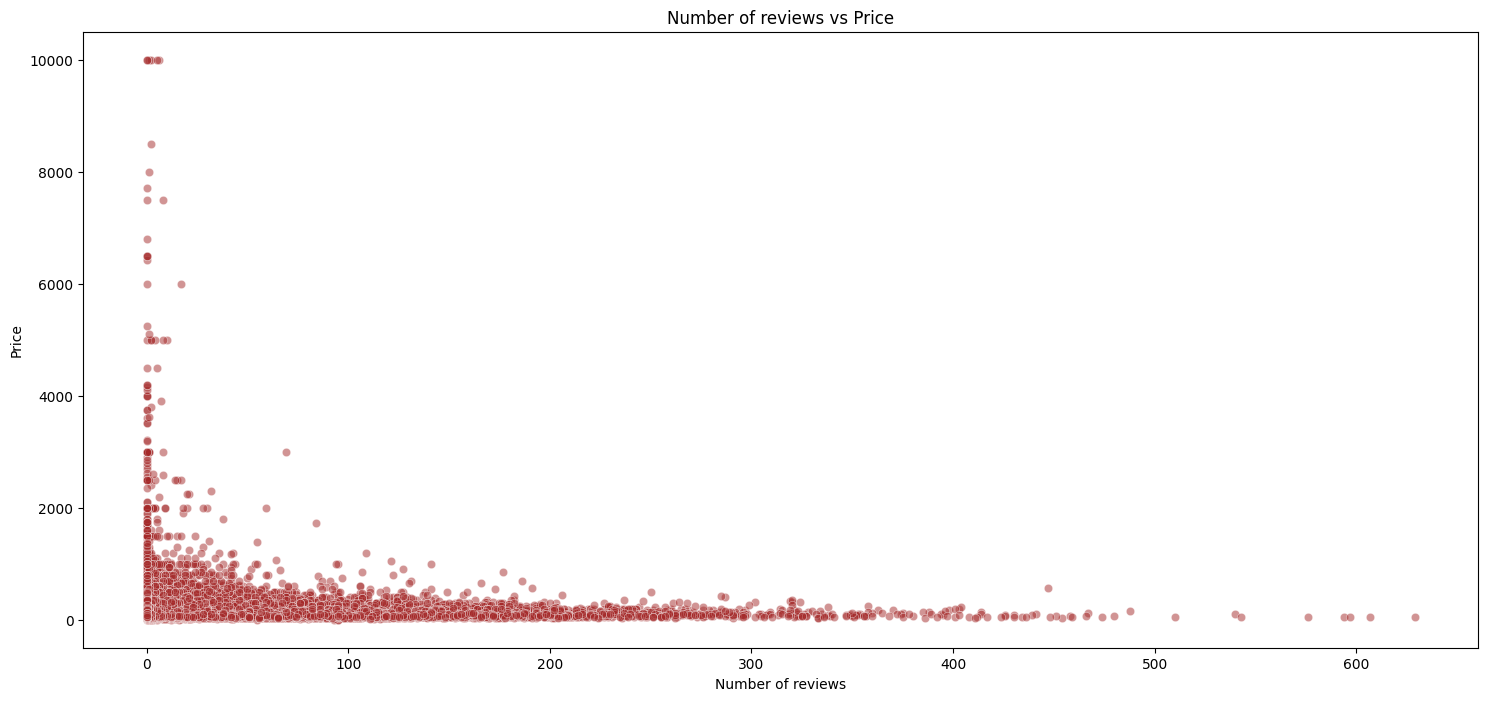

In [23]:
# Chart - 7 visualization code
sns.scatterplot(data=df, x= 'number_of_reviews',y= 'price', alpha =0.5,color = 'brown')
plt.title('Number of reviews vs Price')
plt.xlabel('Number of reviews')
plt.ylabel('Price')
plt.show()

##### 1. Why did you pick the specific chart?

**A histogram is suitable for understanding the distribution of numerical data such as number of reviews per listing.**

##### 2. What is/are the insight(s) found from the chart?

**Most listings have fewer that 50 reviews, with a few highly reviewed listings.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, identifying highly reviewed listings can help in understanding guest preferences and service quality.**

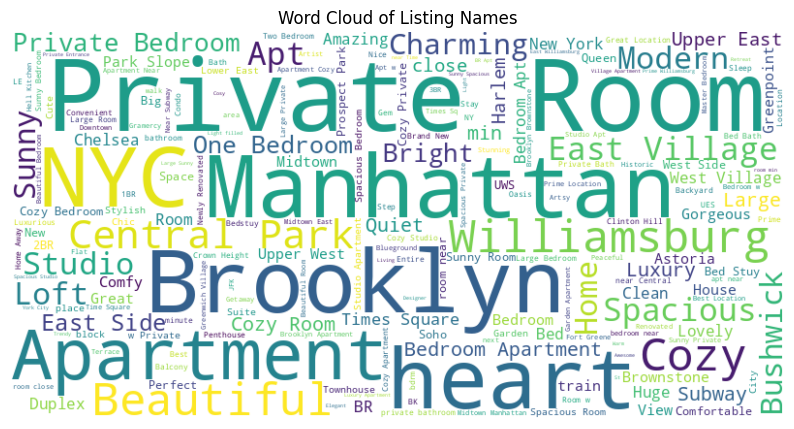

In [24]:
# Chart - 8 WordCloud
text = ' '.join(df['name'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Listing Names')
plt.axis('off')
plt.show()


1. Why did you pick the specific chart?

**This chart will helps for finding the most booked rooms, host namesm neightbourhood groups.**

2. What is/are the insight(s) found from the chart?

**With this chart we know that most business host names, neighbourhood groups, room types.**

3. Will the gained insights help creating a positive business impact?

**Yes, we will find most booked room types, host names, nighbourhood groups. with this we can focus more.**

#### Chart - 9

In [ ]:
# Chart - 9 Geographical distribution of listings

# Create a map centered around NYC
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Add heat map
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(nyc_map)

nyc_map

##### 1. Why did you pick the specific chart?

**A heatmap on a map helps to visualize the geographical listings and identify areas with high concentrations**.

##### 2. What is/are the insight(s) found from the chart?

**Listings are concentrated in Manhattan and Brooklyn, few listings in other Boroughs.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, understanding geographical concentrations can help in strategic decision making in new listings and marketing efforts.**

#### Chart - 10

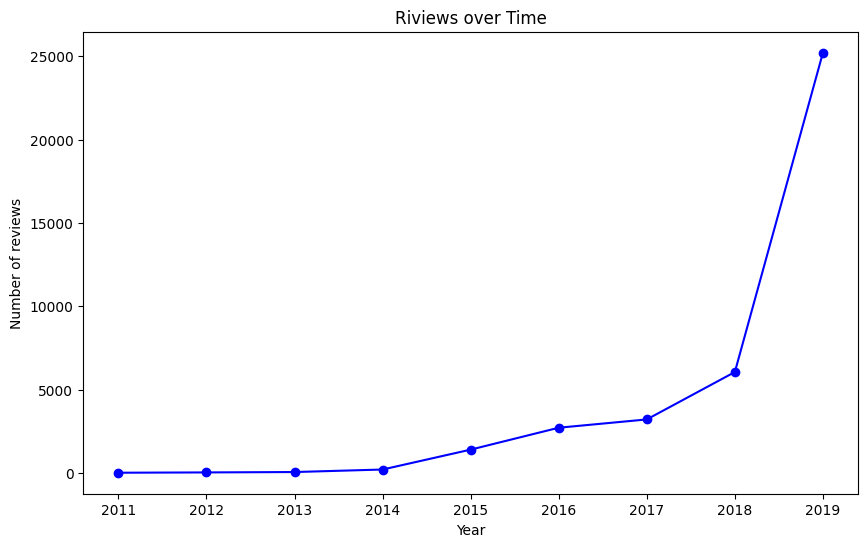

In [26]:
# Chart - 10 Review over Time (Line chart)
plt.rcParams['figure.figsize'] = (10,6)
df['last_review_year'] = df['last_review'].dt.year
reviews_per_year = df['last_review_year'].value_counts().sort_index()
plt.plot(reviews_per_year.index, reviews_per_year.values, marker = 'o', color = 'b')
plt.title('Riviews over Time')
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.show()

##### 1. Why did you pick the specific chart?

**A bar chart helps to show changes over time, such as number of reviews per year.**

##### 2. What is/are the insight(s) found from the chart?

**There has been a consistent increase in the number of reviews over years.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, this insight indicates growing interest and usage of Airbnb over time.**

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018.0


#### Chart - 11

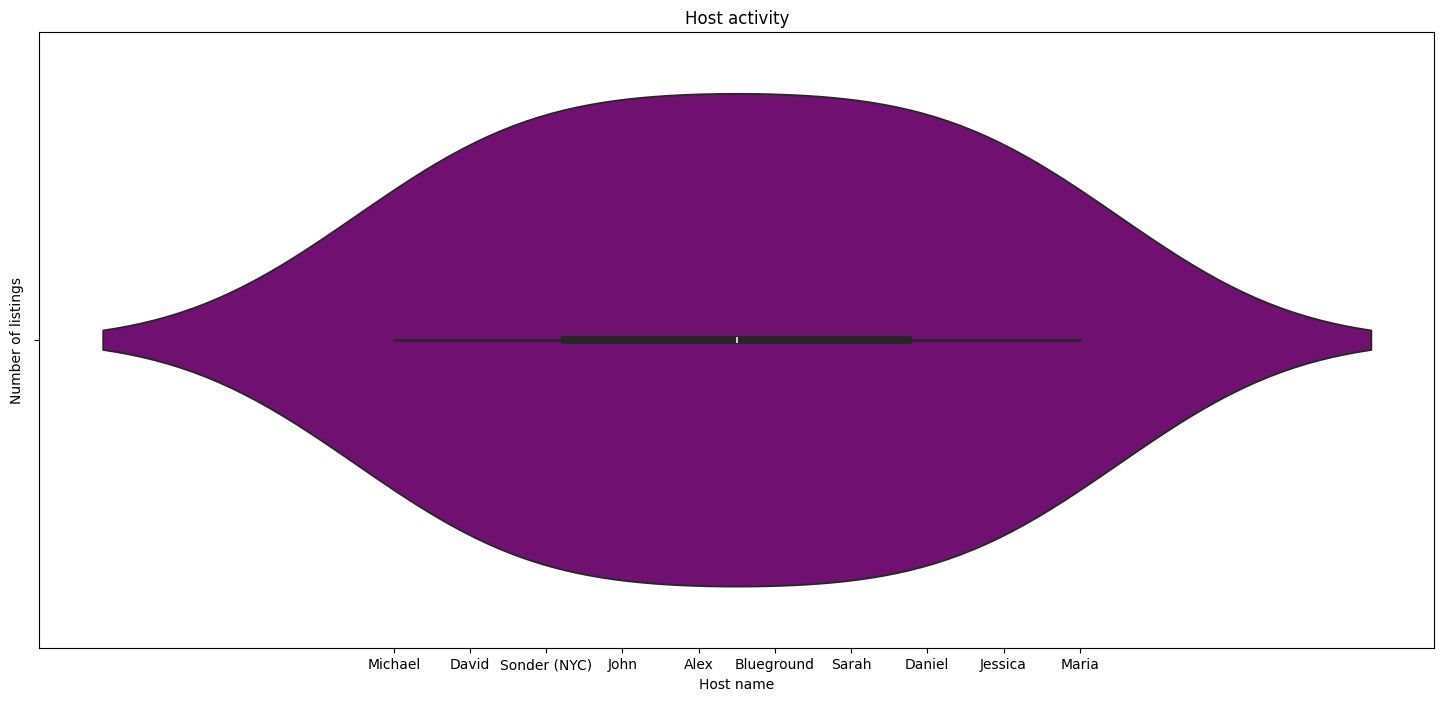

In [29]:
# Chart - 11 Host activity
plt.rcParams['figure.figsize'] = (18,8)
host_listing_count = df.groupby('host_name')['id'].count().reset_index()
host_listing_count.columns = ['host_name','listings_count']
host_listing_count = host_listing_count.sort_values(by='listings_count', ascending=False)
#Filtering top 10 hosts
top_hosts = host_listing_count.head(10)
sns.violinplot(data=top_hosts, x = 'host_name', color = 'purple')
plt.title('Host activity')
plt.xlabel('Host name')
plt.ylabel('Number of listings')
plt.show()

##### 1. Why did you pick the specific chart?

**This bar chart can helps for showing the distribution of categorical data such as number of listings per host.**

##### 2. What is/are the insight(s) found from the chart?

**From the chart we can understand that "Michael" is top host followedby "David" and "Sonder".**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, identifying superhosts can help in understanding successful hosting strategies.**

#### Chart - 12

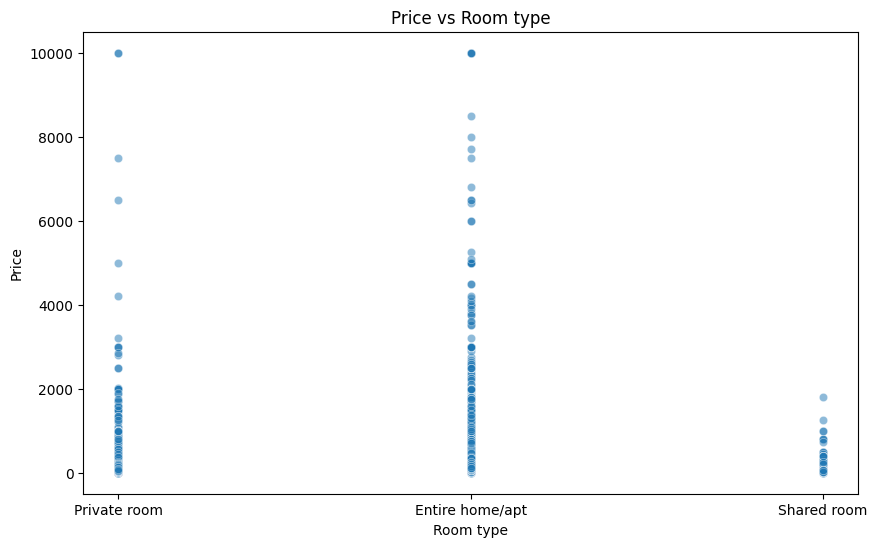

In [ ]:
# Chart - 9 room type vs price --> scatterplot
plt.rcParams['figure.figsize'] = (10,6)
sns.scatterplot(data = df, x = 'room_type', y = 'price', alpha = 0.5)
plt.title("Price vs Room type")
plt.xlabel('Room type')
plt.ylabel('Price')
plt.show()


##### 1. Why did you pick the specific chart?

**From this chart we can identify prices of all room types.**

##### 2. What is/are the insight(s) found from the chart?

**This chart will help to understand that the "Shared room" having low prices compare to other room types.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, "Shared room" having less prices compare to other room types, we can focus price of other room types also.**

#### Chart - 13

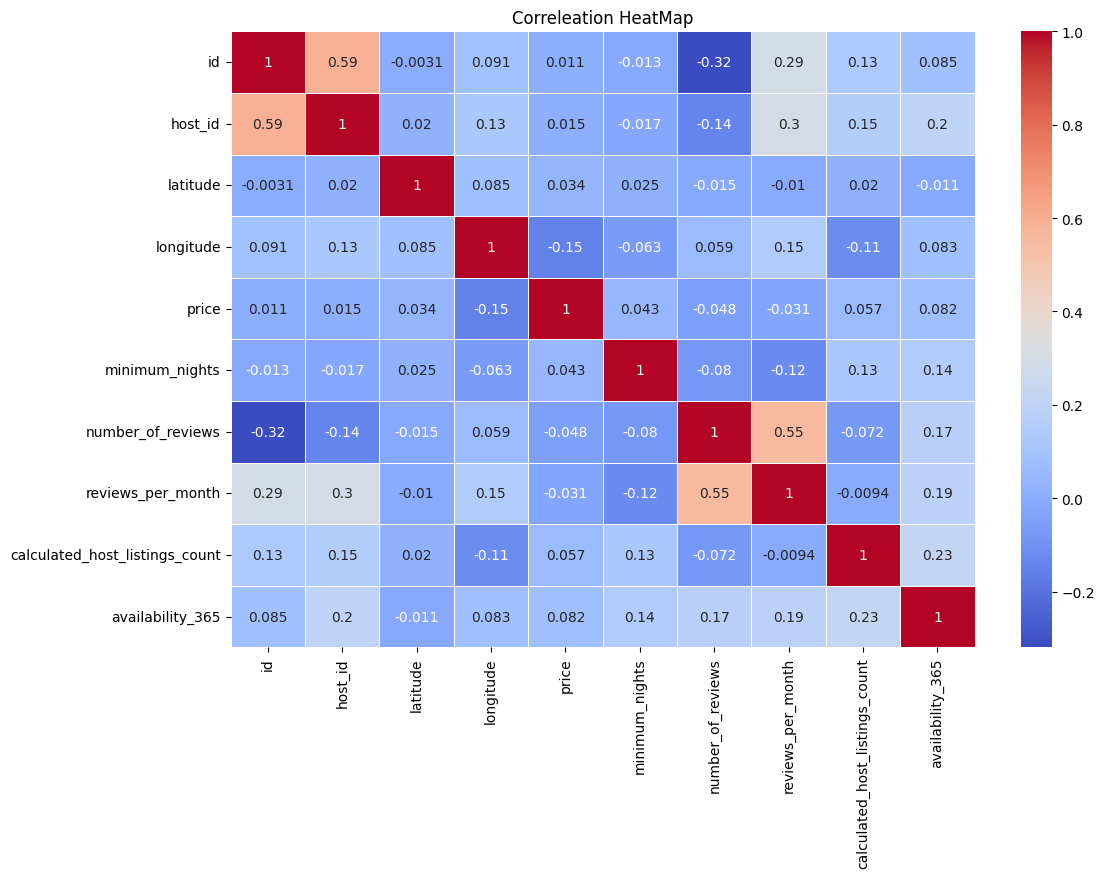

In [ ]:
# Chart - 13 Correleation Heat Map
plt.rcParams['figure.figsize'] = (12,8)
corr_matrix = df.select_dtypes(include=[np.number])
sns.heatmap(corr_matrix.corr(), annot= True, cmap='coolwarm', linewidths=0.5)
plt.title('Correleation HeatMap')
plt.show()

##### 1. Why did you pick the specific chart?

**A heat map helps to visualize correlations between numerical variables.**

##### 2. What is/are the insight(s) found from the chart?

The correlation heatmap reveals several important relationships between features:
-  A high positive correlation between 'minimum_nights'and 'availability_365' suggests that listings with longer minimum stay requirements tend to be more available throughout the year.
- 'price' shows a moderate positive correlation with 'number_of_reviews', indicating that listings with more reviews tend to have higher prices.
- 'calculated_host_listings_count' has a positive correlation with 'availability_365', suggesting that hosts with more listings tend to have higher availability.
- Other correlations can be analyzed similarly to understand the interactions between various features.

These insights help in identifying which factors might influence listing prices and availability, guiding strategic decisions for both hosts and Airbnb.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help create a positive business impact in several ways.

*   Hosts can adjust their pricing strategies based on the identified correlations, potentially increaing their revenue.
*   Understanding the relationship between 'minimum_nights' and 'availability_365' can help hosts optimize their booking policies to increase occupancy rates.

*   Airbnb can use these insights to provide better recommendations to hosts fot optimizing their listings and improving customer satisfaction,
*   Identifying multicollinearity helps in building more accurate predictive models, enhancing Airbnb's data-driven decision-making processes.

Overall, the insights from the correlation heatmap can contribute to better business strategies and improved operational efficiency.

#### Chart - 14

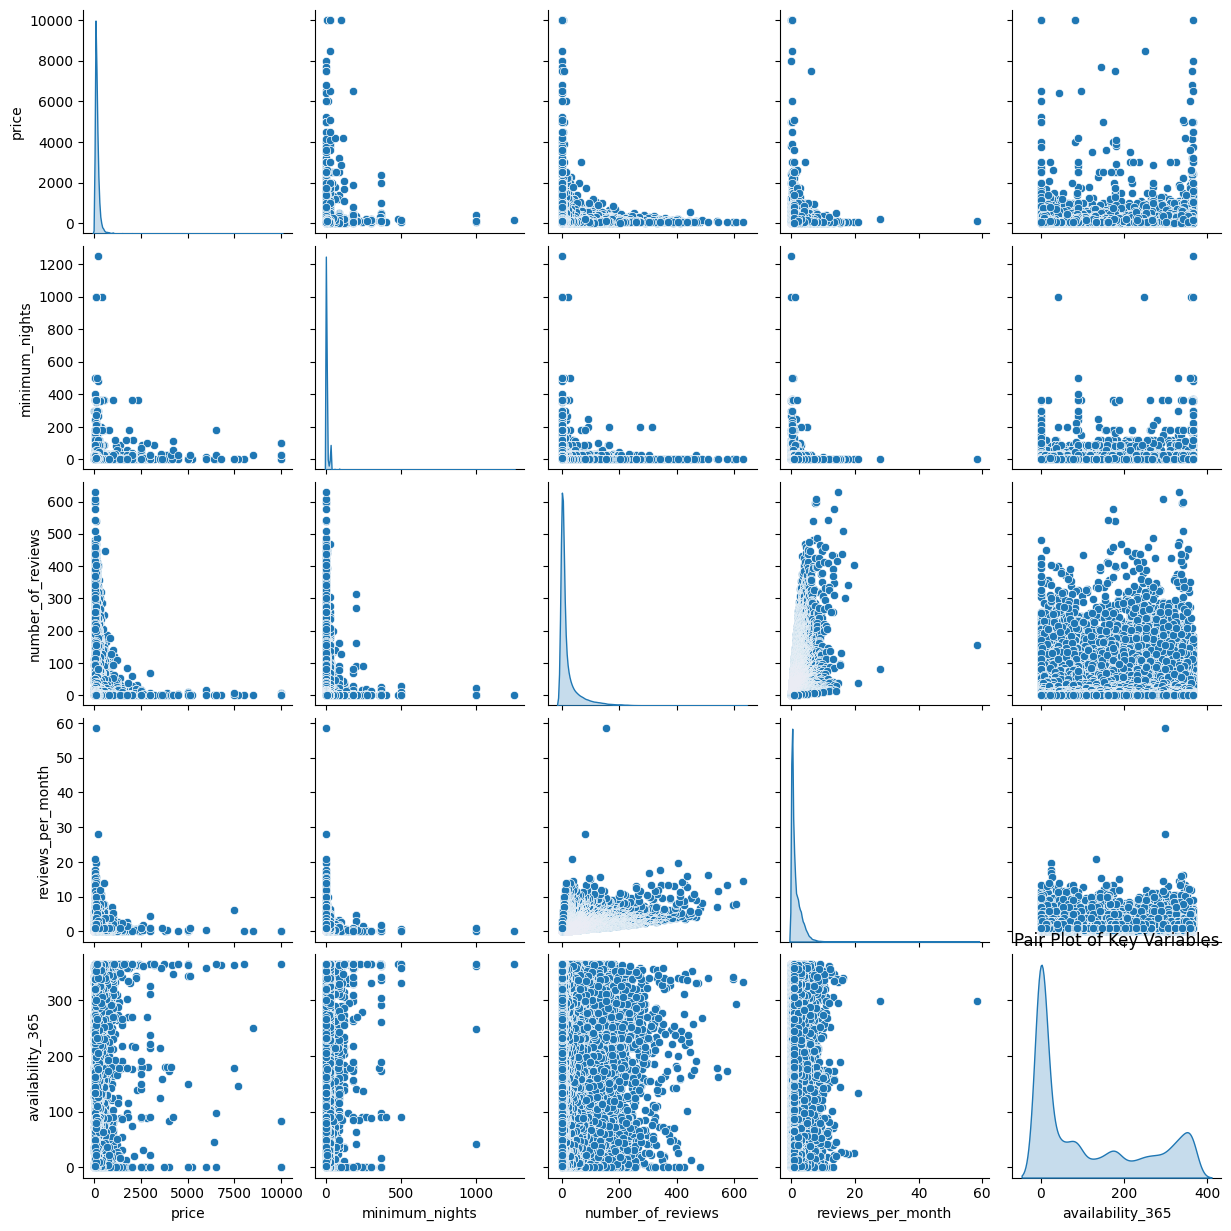

In [ ]:
# Chart - 11 Pair plot
plt.rcParams['figure.figsize'] = (10,6)
sns.pairplot(df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']], diag_kind='kde')
plt.title('Pair Plot of Key Variables')
plt.show()


##### 1. Why did you pick the specific chart?

**A pair plot helps to visualize relationships between multiple numerical variables.**

##### 2. What is/are the insight(s) found from the chart?

**The pair plot reveals potential relationships between variables, aiding in further analysis.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes, these insights can guide more detailed exploratory analysis and modeling efforts.**

### Chart - 15

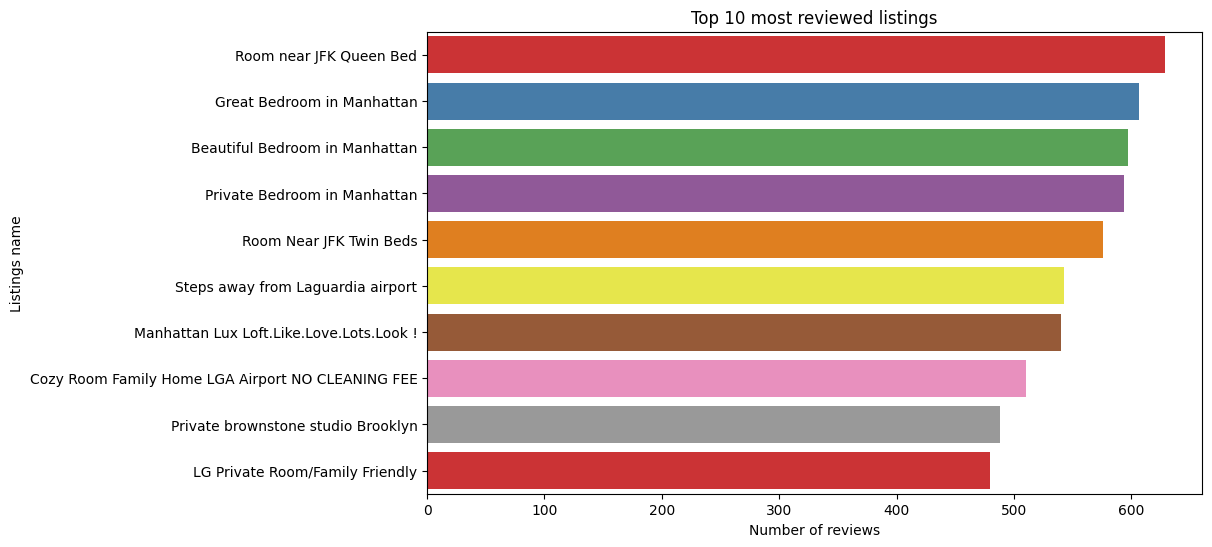

In [34]:
# Top 10 most reviewed Listings
top_reviewed = df.nlargest(10, 'number_of_reviews')[['name','number_of_reviews']]
plt.rcParams['figure.figsize'] = (10,6)
sns.barplot(x = top_reviewed['number_of_reviews'], y = top_reviewed['name'], palette='Set1')
plt.title("Top 10 most reviewed listings")
plt.xlabel('Number of reviews')
plt.ylabel('Listings name')
plt.show()

1. Why did you pick the specific chart?

**This bar plot helps for finding who given most reviews**

2. What is/are the insight(s) found from the chart?

**From this chart we know that most reviews from Room near JFK Queen bed**

3. Will the gained insights help creating a positive business impact?

**Yes, it will help for finding who is giving most reviews.**

### Chart - 16

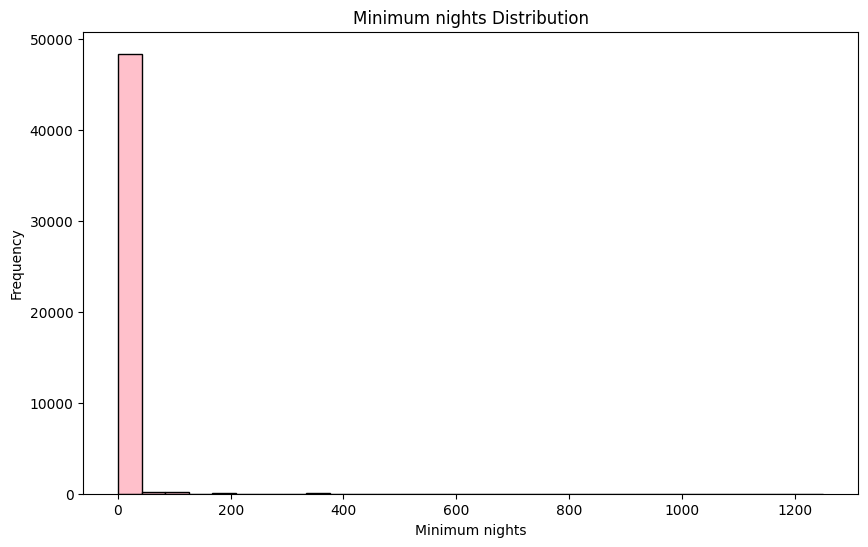

In [35]:
# Chart - 16 Minimum nights -- Histogram
plt.hist(df['minimum_nights'], bins = 30, color = 'pink', edgecolor = 'black')
plt.title("Minimum nights Distribution")
plt.xlabel("Minimum nights")
plt.ylabel("Frequency")
plt.show()

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Based on the insights gained from the EDA, the following strategies are recommended:

1. **Focus on Increasing Listings in High-Demand Areas:**
   
   The analysis revealed that Manhattan and Brooklyn are the most popular neighborhoods with the highest number of listings. Increasing the number of listings in these high-demand areas can attract more guests and increase occupancy rates.

2. **Optimize Pricing Strategy:**
   
  Understanding the price distribution across different neighborhoods and identifying outliers can help hosts set competitive prices. For example, listings in Manhattan generally have higher prices. Hosts can use this information to adjust their pricing strategy accordingly.

3. **Promote Popular Room Types:**
   
   The room type distribution analysis showed that 'Entire home/apt' and 'Private room' are the most popular room types. Promoting these room types can attract more guests and increase booking rates.

4. **Adjust Availability to Match Demand Patterns:**
   
   The analysis of listing availability highlighted that some neighborhoods have higher availability, which could indicate lower demand or higher supply. Hosts can adjust their availability to match the demand patterns identified in the analysis, optimizing their booking rates.

5. **Encourage Hosts to Seek More Reviews:**
   
   The correlation analysis showed a moderate positive correlation between the number of reviews and the listing price. Encouraging hosts to seek more reviews can increase the visibility and attractiveness of their listings, potentially leading to higher prices and increased bookings.

These strategies can help improve occupancy rates, revenue, and overall customer satisfaction.


# **Conclusion**

The exploratory data analysis of the Airbnb NYC 2019 dataset revealed important insights into the dynamics of Airbnb listings in New York City. Key findings include:

- Manhattan and Brooklyn are the most popular neighborhoods with the highest number of listings.
- Entire homes/apartments and private rooms are the most preferred room types among guests.
- There is a clear pricing trend across different neighborhoods, with Manhattan listings being more expensive.
- Listing availability varies significantly by neighborhood, indicating different levels of demand and supply.
- Encouraging hosts to seek more reviews can increase the visibility and attractiveness of their listings.

These insights help Airbnb and its hosts to better understand the market, optimize their pricing and availability strategies, and improve overall guest satisfaction. By leveraging these findings, Airbnb can enhance its platform's performance and continue to grow in a competitive market.
